<a href="https://colab.research.google.com/github/naqiyahdhankot/LaunchED_Projects/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style

importing data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Student_Performance.csv to Student_Performance.csv


In [ ]:
df=pd.read_csv('Student_Performance.csv')

EDA

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe(include="all")

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


unique values for categorical variables

In [ ]:
#rename column labels of dataframe with columns attribute
df.columns=['HoursStudied','PreviousScores','ExtracurricularActivities','SleepHours','SamplePapersPracticed','PerformanceIndex']

In [ ]:
for column in df.columns:
  if df[column].dtype =='object':
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

EXTRACURRICULARACTIVITIES :  2
ExtracurricularActivities
Yes    4948
No     5052
Name: count, dtype: int64




converting extracurricular from yes and no to boolean

In [ ]:
df.ExtracurricularActivities.replace(['Yes','No'],[True,False],inplace=True)

/tmp/ipython-input-464271415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.ExtracurricularActivities.replace(['Yes','No'],[True,False],inplace=True)
/tmp/ipython-input-464271415.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.ExtracurricularActivities.replace(['Yes','No'],[True,False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HoursStudied               10000 non-null  int64  
 1    PreviousScores            10000 non-null  int64  
 2   ExtracurricularActivities  10000 non-null  bool   
 3   SleepHours                 10000 non-null  int64  
 4   SamplePapersPracticed      10000 non-null  int64  
 5   PerformanceIndex           10000 non-null  float64
dtypes: bool(1), float64(1), int64(4)
memory usage: 400.5 KB


converting categorical to dummy variable

In [ ]:
df.ExtracurricularActivities.astype("object")

,ExtracurricularActivities
0,True
1,False
2,True
3,True
4,False
...,...
9995,True
9996,True
9997,True
9998,True


In [ ]:
#there is no categorical data in our data, if there is then do this step
# df=pd.get_dummies(df,columns=['col1','col2'],drop_first=True)

In [ ]:
df.head()

,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SamplePapersPracticed,PerformanceIndex
0,7,99,True,9,1,91.0
1,4,82,False,4,2,65.0
2,8,51,True,7,2,45.0
3,5,52,True,5,2,36.0
4,7,75,False,8,5,66.0


In [ ]:
#are there any missing values?
df.isnull().sum()

,0
HoursStudied,0
PreviousScores,0
ExtracurricularActivities,0
SleepHours,0
SamplePapersPracticed,0
PerformanceIndex,0


In [ ]:
#if null values are there then
# for column in df.columns:
#   if df[column].dtype != 'object':
#     mean=df[column].mean()
#     df[column]=df[column].fillna(mean)

# df.isnull().sum()

check for duplicates

In [ ]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 127


,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SamplePapersPracticed,PerformanceIndex
915,9,52,False,5,9,48.0
1477,7,61,True,6,8,54.0
1601,5,99,False,7,5,89.0
1786,2,62,True,9,4,40.0
2026,5,87,True,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,True,4,3,71.0
9940,8,95,False,5,2,90.0
9954,6,97,False,8,7,92.0
9966,1,41,False,7,3,12.0


In [ ]:
print('Before',df.shape)
df.drop_duplicates(inplace=True)
print('After',df.shape)

Before (10000, 6)
After (9873, 6)


In [ ]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SamplePapersPracticed,PerformanceIndex


correlation plot

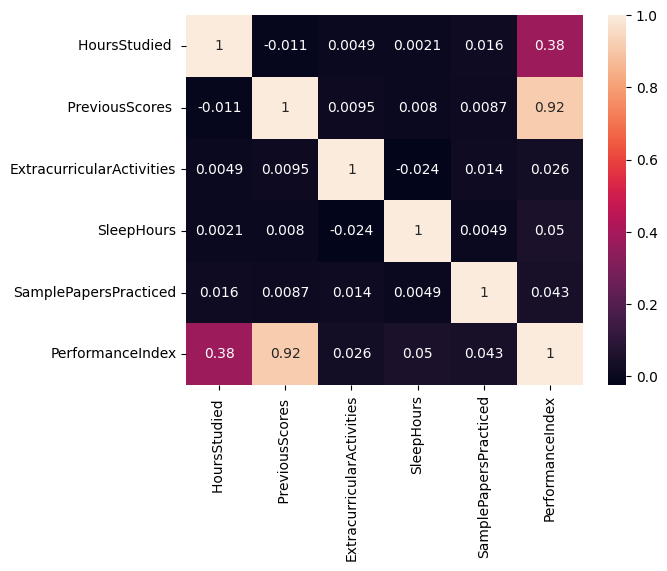

In [ ]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

outlier checks

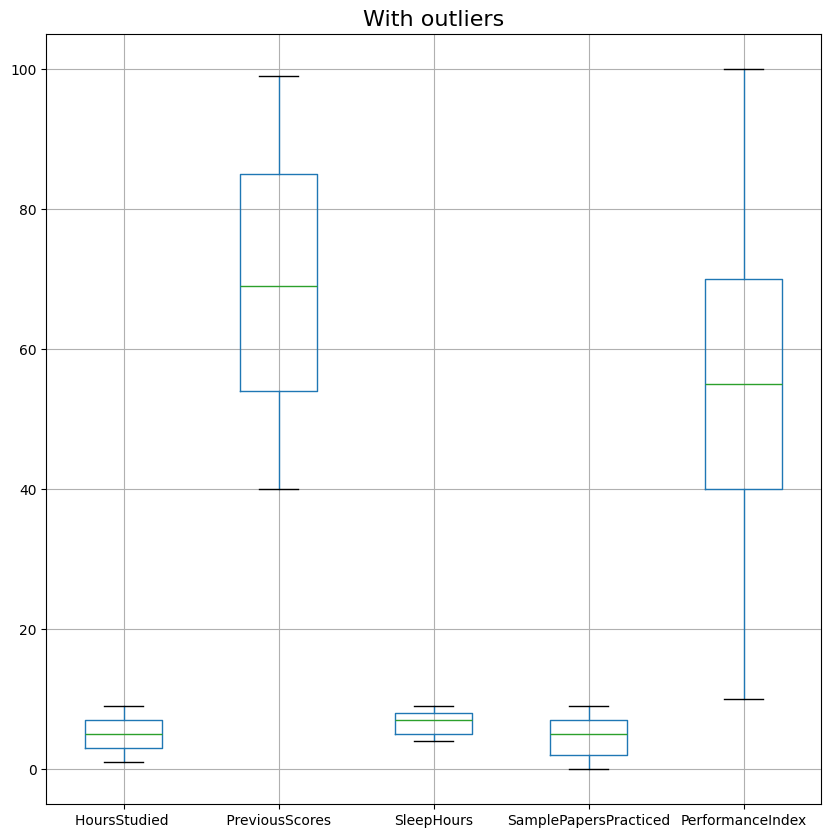

In [ ]:
#construct boxplot for continous variables
cont=df.dtypes[(df.dtypes!='uint8')&(df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot()
plt.title('With outliers', fontsize=16)
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [ ]:
for column in df[cont].columns:
  lr,ur=remove_outlier(df[column])
  df[column]=np.where(df[column]>ur,ur,df[column])
  df[column]=np.where(df[column]<lr,lr,df[column])

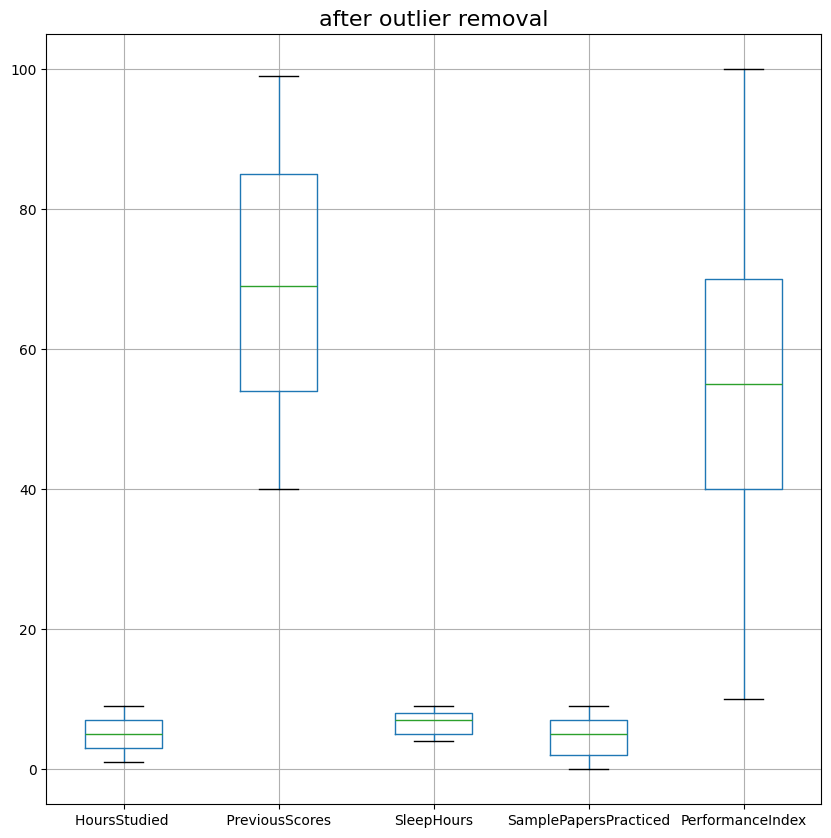

In [ ]:
plt.figure(figsize=(10,10))
df[cont].boxplot()
plt.title('after outlier removal', fontsize=16)
plt.show()

data distribution

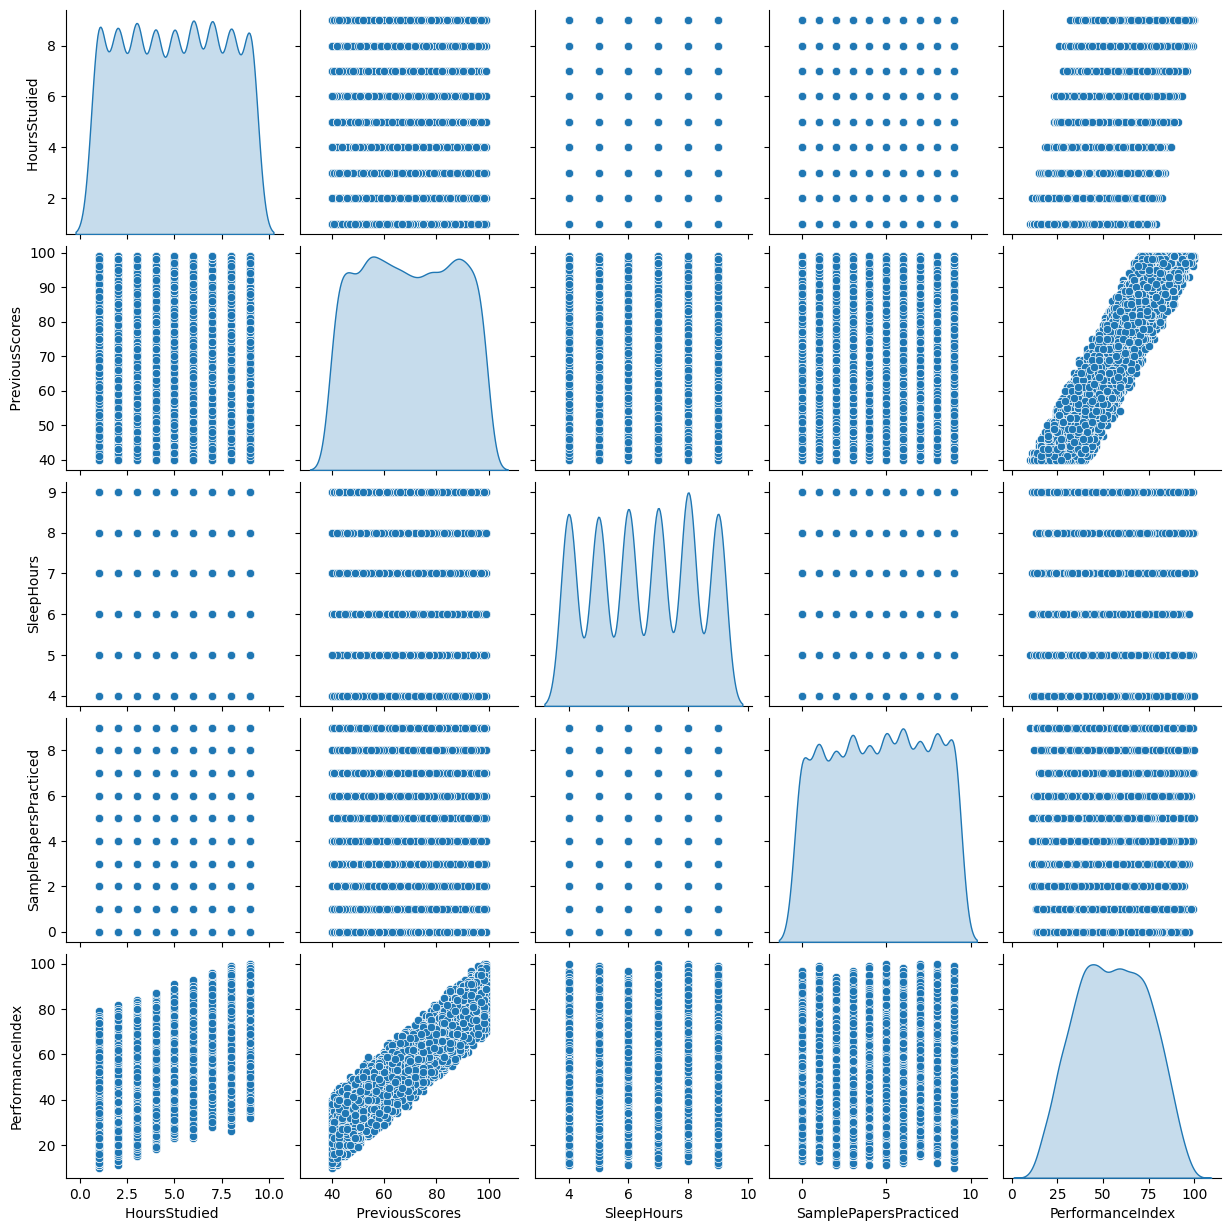

In [ ]:
df_attr=(df[cont])
sns.pairplot(df_attr, diag_kind='kde')
plt.show()


train test split

In [ ]:
#copy all predictor variables into x dataframe
x=df.drop('PerformanceIndex',axis=1)
#copy target variable into y dataframe
y=df['PerformanceIndex']

In [ ]:
x.head()

,HoursStudied,PreviousScores,ExtracurricularActivities,SleepHours,SamplePapersPracticed
0,7.0,99.0,True,9.0,1.0
1,4.0,82.0,False,4.0,2.0
2,8.0,51.0,True,7.0,2.0
3,5.0,52.0,True,5.0,2.0
4,7.0,75.0,False,8.0,5.0


In [ ]:
#split x and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

linear regression model

In [ ]:
#invoke the linear regression function and find bestfit model on training data
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(x_train.columns):
  print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for HoursStudied  is 2.854656583293554
The coefficient for  PreviousScores  is 1.0180144770495494
The coefficient for ExtracurricularActivities is 0.6309651327603542
The coefficient for SleepHours is 0.4817684495108097
The coefficient for SamplePapersPracticed is 0.18424008305477774


In [ ]:
#let us check intercept for thr model
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -34.03776699041164


In [ ]:
#R square on training data
regression_model.score(x_train,y_train)

0.988654871404408

In [ ]:
#R square on testing data
regression_model.score(x_test,y_test)

0.9887498677221606

In [ ]:
#RMSE on training data
predicted_train=regression_model.fit(x_train,y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

np.float64(2.043501677331696)

In [ ]:
#RMSE on testing data
predicted_test=regression_model.fit(x_train,y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

np.float64(2.0443195626480994)

linear regression using statsmodels(OLS)

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train=sm.add_constant(x_train)  #adds constant term beta to simple linear regression
x_test=sm.add_constant(x_test)
x_train['ExtracurricularActivities'] = x_train['ExtracurricularActivities'].astype(int)
x_test['ExtracurricularActivities'] = x_test['ExtracurricularActivities'].astype(int)

In [ ]:
model=sm.OLS(y_train,x_train).fit()
model

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PerformanceIndex   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.289e+05
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:15:51   Log-Likelihood:                -15797.
No. Observations:                7404   AIC:                         3.161e+04
Df Residuals:                    7398   BIC:                         3.165e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -34.0378      0.148   -230.566      0.000     -34.327     -33.748
HoursStudied                  2.8547      0.009    310.370      0.000       2.837       2.873
 PreviousScores               1.0180      0.001    740.764      0.000       1.015       1.021
ExtracurricularActivities     0.6310      0.048     13.273      0.000       0.538       0.724
SleepHours                    0.4818      0.014     34.367      0.000       0.454       0.509
SamplePapersPracticed         0.1842      0.008     22.158      0.000       0.168       0.201
==============================================================================
Omnibus:                        1.846   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.861
Skew:                           0.004   Prob(JB):                        0.394
Kurtosis:                       3.077   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""